In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to extract jawline width
def extract_jawline_width(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    if len(faces) == 0:
        return None  # No face detected

    for (x, y, w, h) in faces:
        left_jaw = (x, y + int(h * 0.75))  # Point on the left jaw
        right_jaw = (x + w, y + int(h * 0.75))  # Point on the right jaw
        jawline_width = right_jaw[0] - left_jaw[0]
        return jawline_width  # Return the jawline width

# Function to extract distance between eyes
def extract_eye_distance(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    if len(faces) == 0:
        return None  # No face detected

    for (x, y, w, h) in faces:
        eye_left = (x + int(w * 0.25), y + int(h * 0.4))  # Approximate position of the left eye
        eye_right = (x + int(w * 0.75), y + int(h * 0.4))  # Approximate position of the right eye
        eye_distance = np.linalg.norm(np.array(eye_left) - np.array(eye_right))
        return eye_distance  # Return the eye distance

In [ ]:
image_folder = r"C:\Users\PRERNA\Downloads\archive (22)\train"
gender_labels = {'men': 0, 'women': 1}  # Assuming 0 for men and 1 for women
jawline_data = []
eye_distance_data = []
image_data = []  # To store the image and corresponding classification result

# Load images and extract features for 20 men and 20 women
for gender, label in gender_labels.items():
    folder_path = os.path.join(image_folder, gender)
    count = 0
    for filename in os.listdir(folder_path):
        if count >= 20:  # Limit to 20 images per gender
            break
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)

            if image is None:
                print(f"Failed to load image: {image_path}")
                continue  # Skip to the next image if loading fails

            # Extract features
            jawline_width = extract_jawline_width(image)
            eye_distance = extract_eye_distance(image)

            if jawline_width is not None and eye_distance is not None:
                jawline_data.append((gender, jawline_width))
                eye_distance_data.append((gender, eye_distance))
                image_data.append((image, gender, jawline_width, eye_distance))  # Save image and its details
                count += 1

# Extract values for statistical analysis
jawline_widths = [width for _, width in jawline_data]
eye_distances = [distance for _, distance in eye_distance_data]


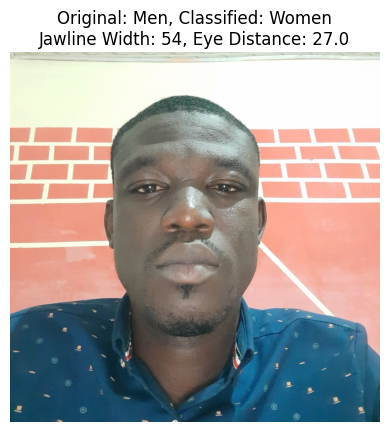

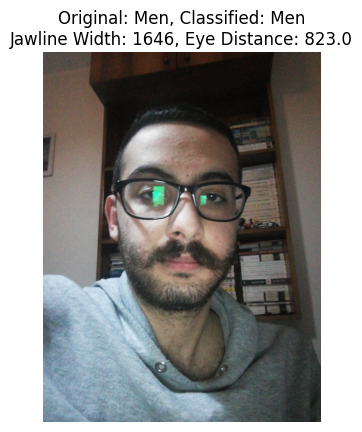

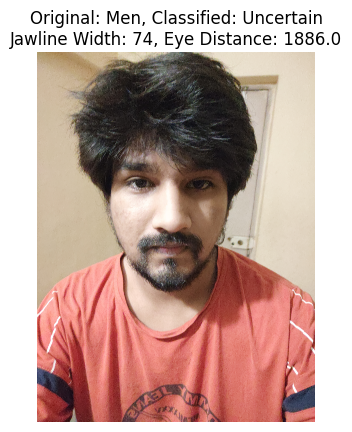

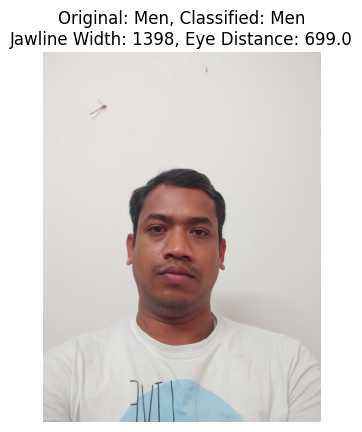

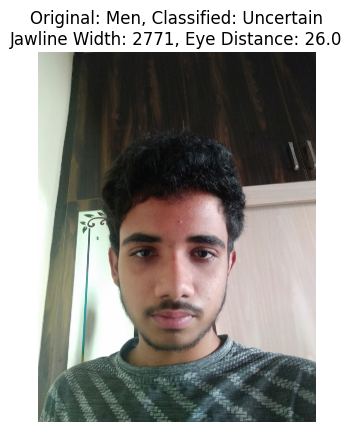

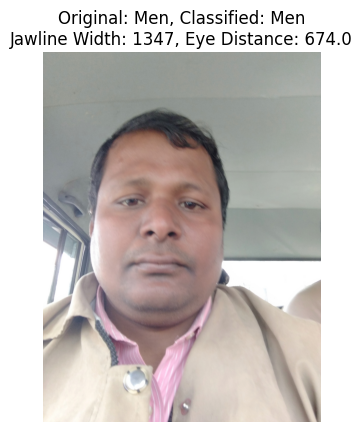

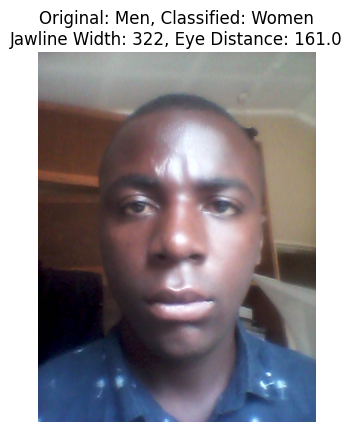

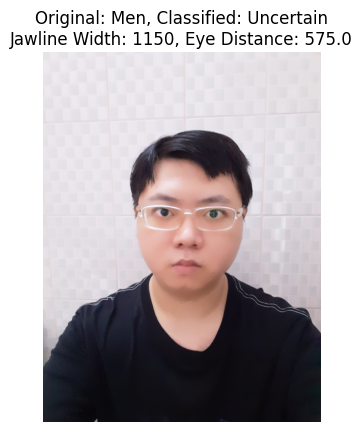

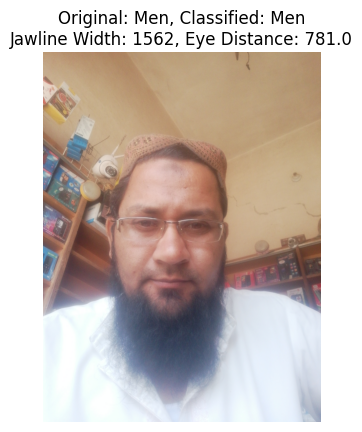

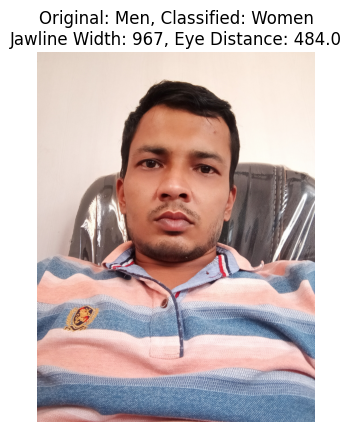

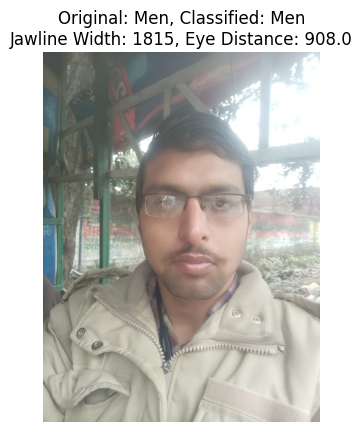

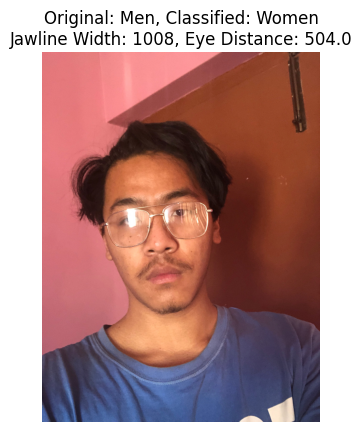

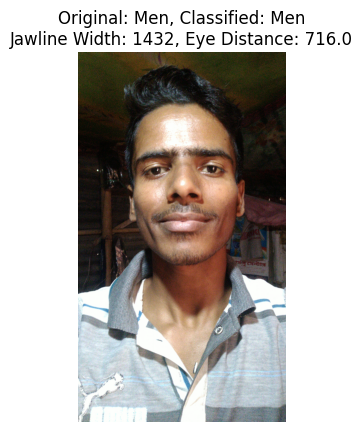

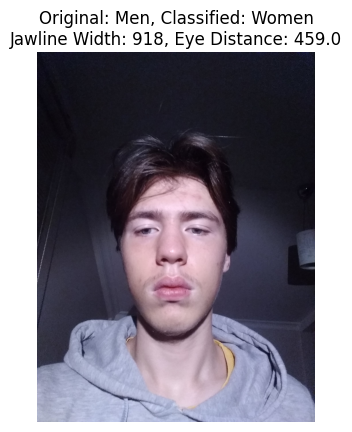

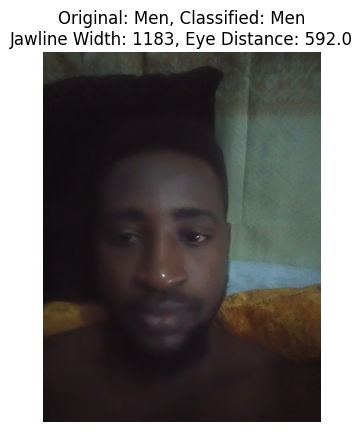

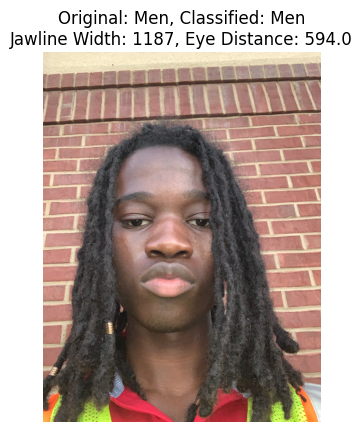

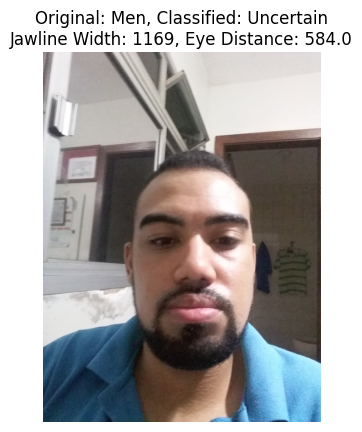

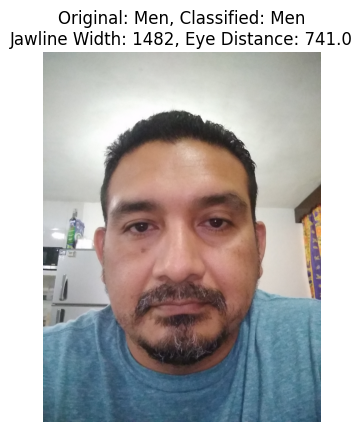

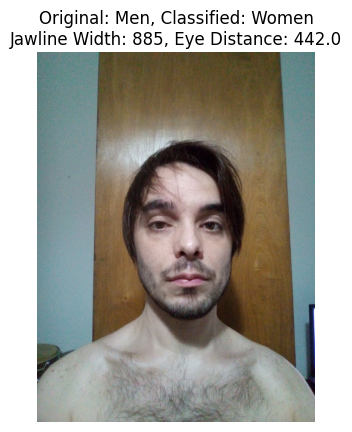

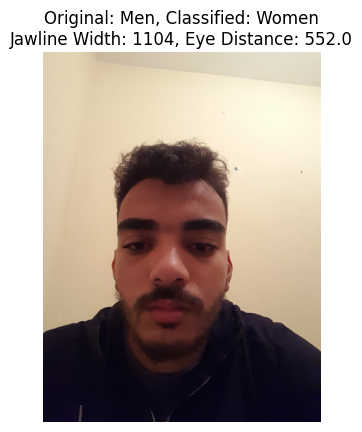

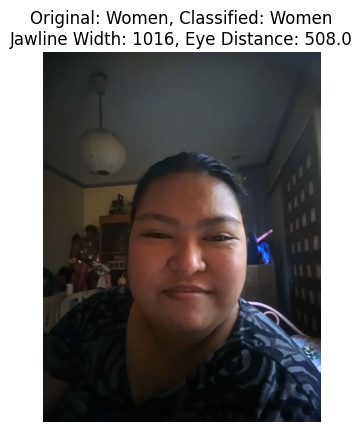

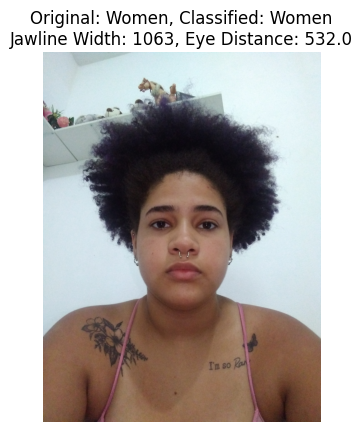

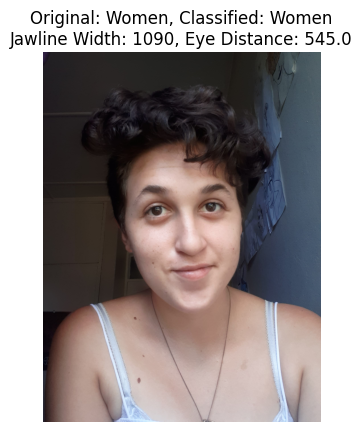

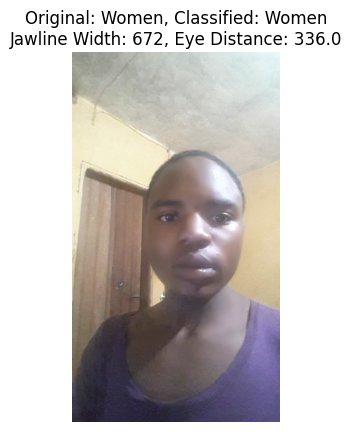

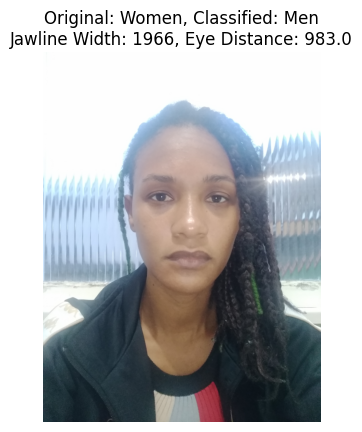

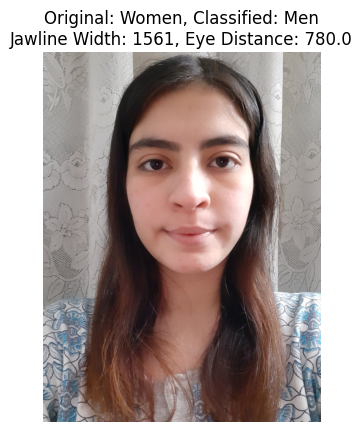

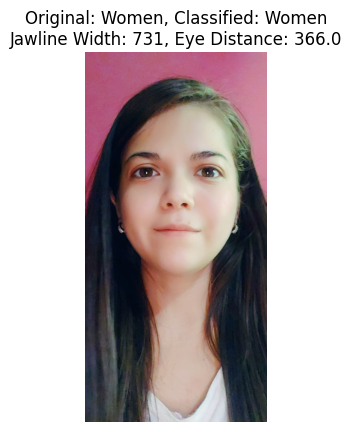

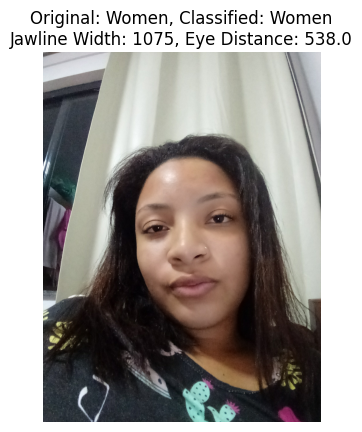

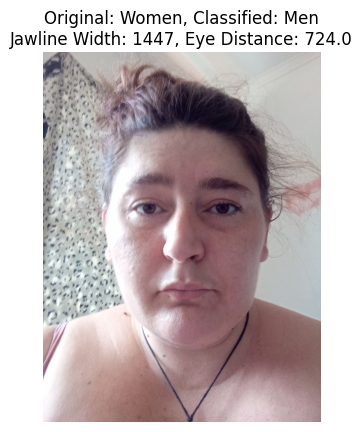

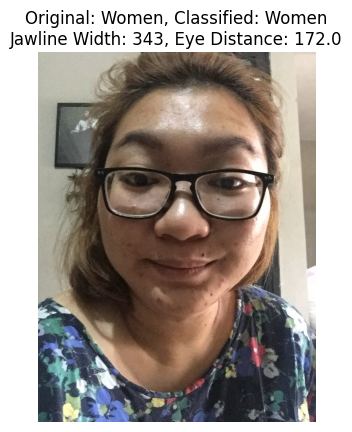

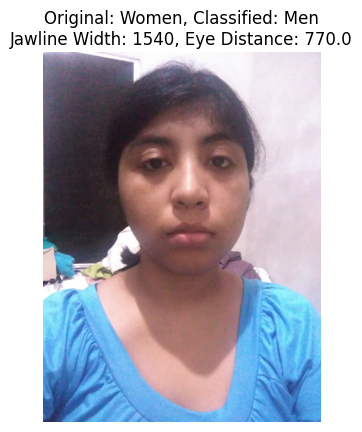

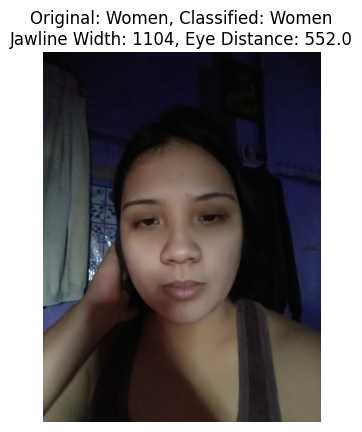

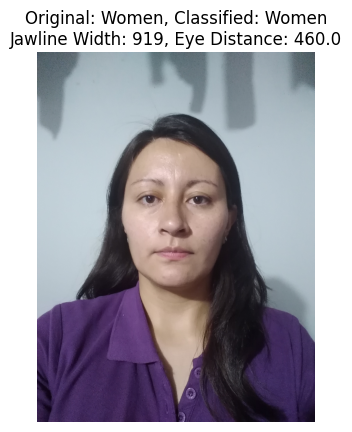

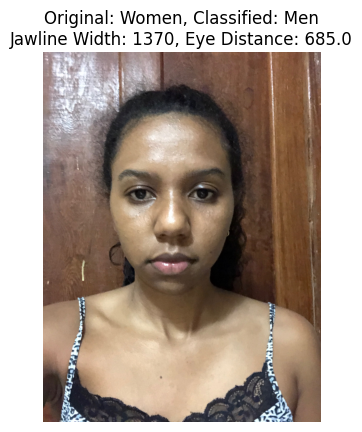

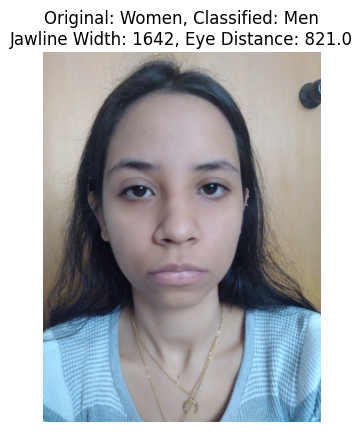

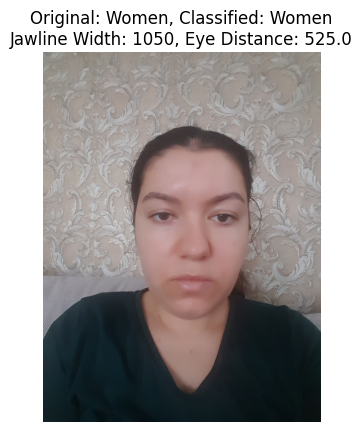

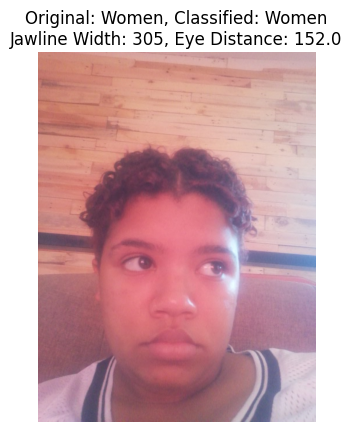

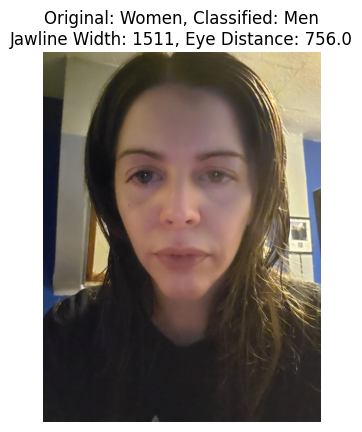

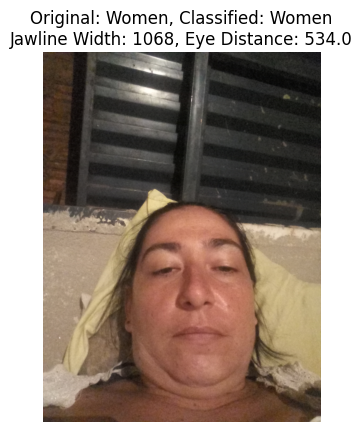

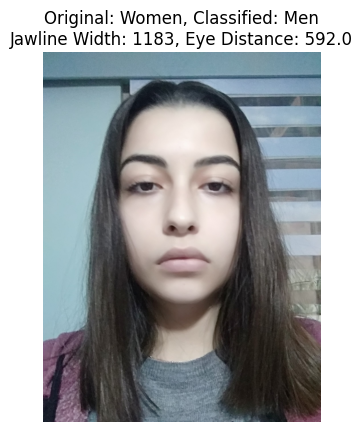

In [34]:
# Calculate means and standard deviations
mean_jawline_men = np.mean([width for gender, width in jawline_data if gender == 'men'])
mean_jawline_women = np.mean([width for gender, width in jawline_data if gender == 'women'])
mean_eye_men = np.mean([distance for gender, distance in eye_distance_data if gender == 'men'])
mean_eye_women = np.mean([distance for gender, distance in eye_distance_data if gender == 'women'])

# Classification using improved thresholds
results = []
margin = 50  # Define a margin for better distinction

for (image, original_gender, jawline_width, eye_distance) in image_data:
    classified_gender = None
    if jawline_width > mean_jawline_women + margin and eye_distance > mean_eye_women:
        classified_gender = 'Men'
    elif jawline_width < mean_jawline_men - margin and eye_distance < mean_eye_men:
        classified_gender = 'Women'
    else:
        classified_gender = 'Uncertain'  # For cases that don't clearly fit

    results.append((image, original_gender, classified_gender, jawline_width, eye_distance))

# Display the classification results along with images
for image, original_gender, classified_gender, jawline_width, eye_distance in results:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Original: {original_gender.capitalize()}, Classified: {classified_gender}\n"
              f"Jawline Width: {jawline_width}, Eye Distance: {eye_distance}")
    plt.axis('off')  # Turn off axis to focus on the image
    plt.show()
